In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.backends.backend_pdf import PdfPages

In [18]:
graph = {2: [14], 3:[13,9, 10], 4:[13,11], 5:[11,10,9], 7:[11, 14], 9:[3, 5, 10], 10:[3,5,9,11], 11:[4,5,7,10,12], 12:[11], 14:[2, 7], 13:[3, 4]}

In [19]:
#Creating the directed graph
G = nx.DiGraph()
for key, values in graph.items():
    for value in values:
        if value > key:
            G.add_edge(key, value)

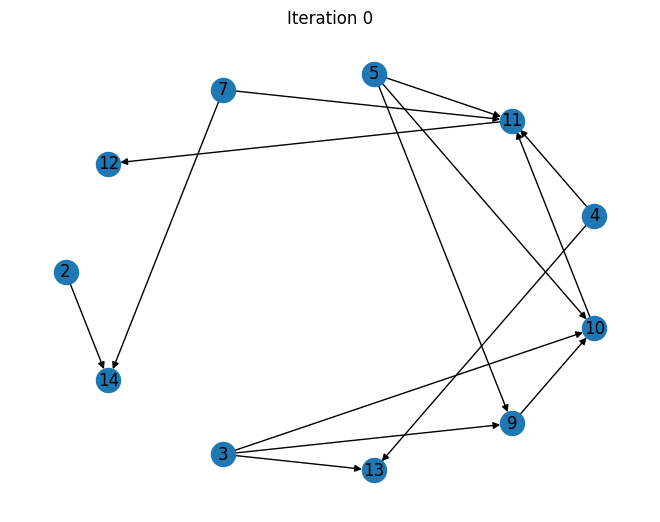

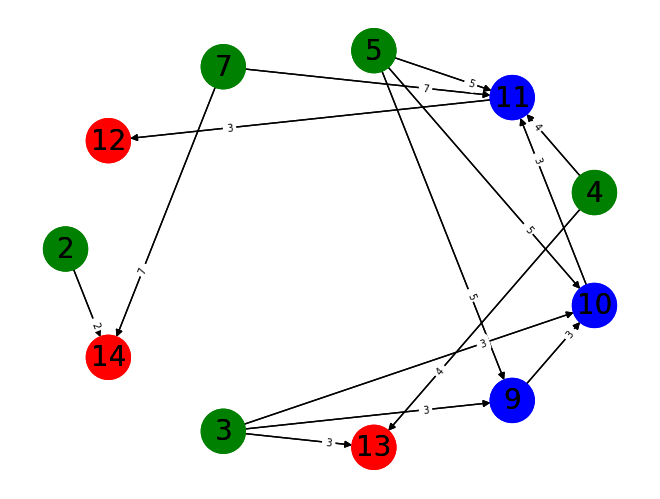

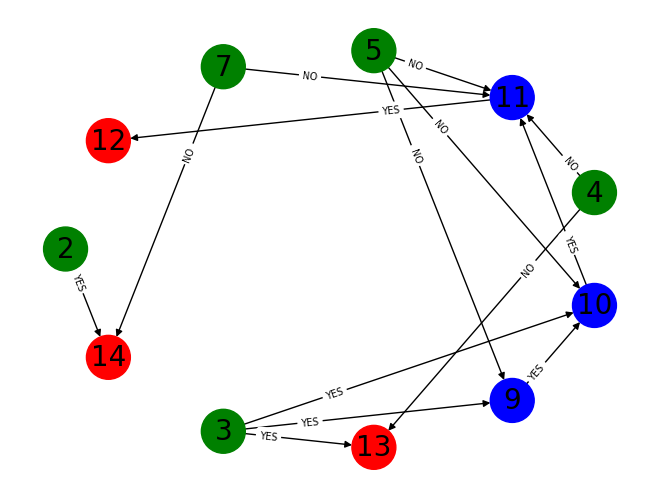

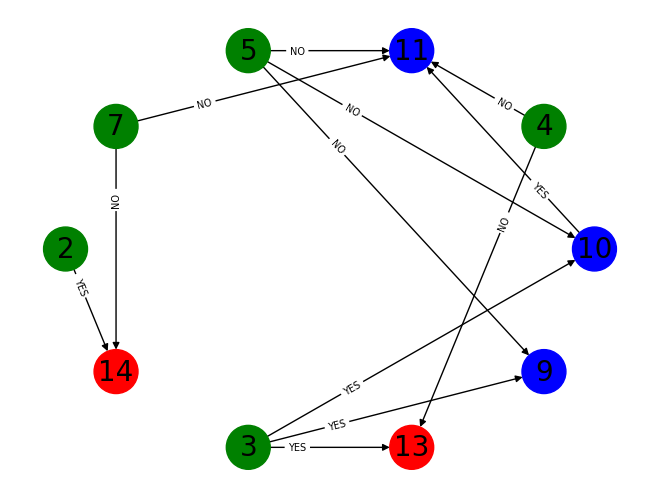

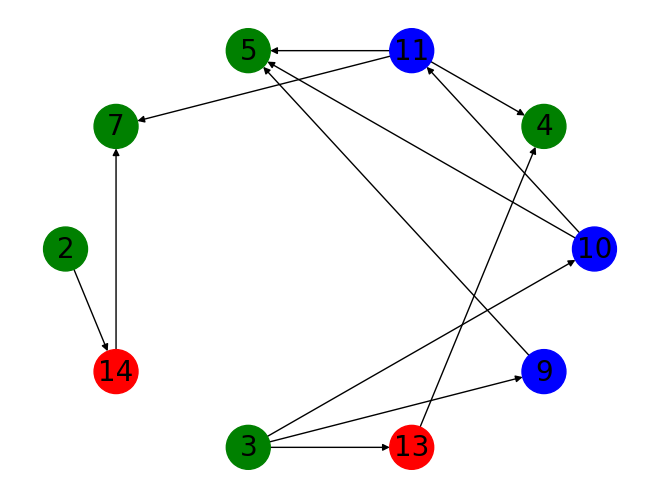

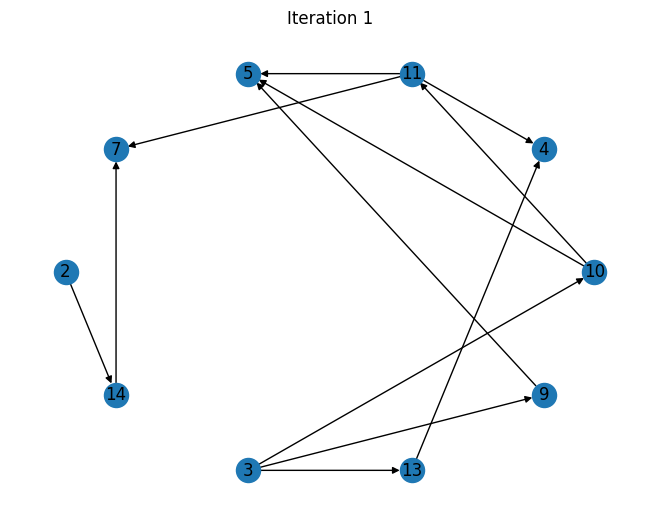

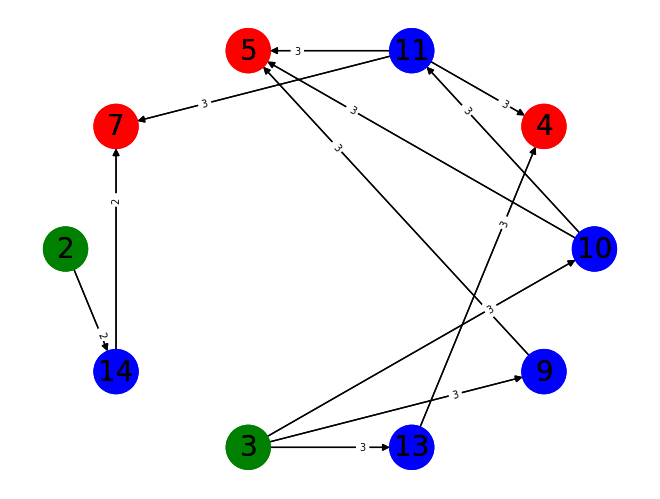

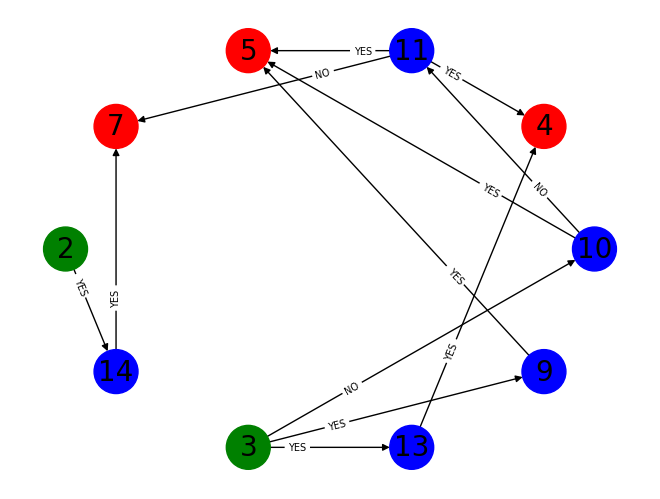

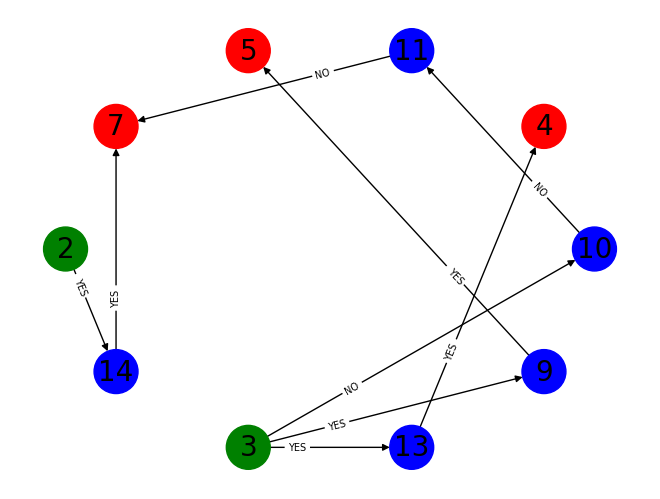

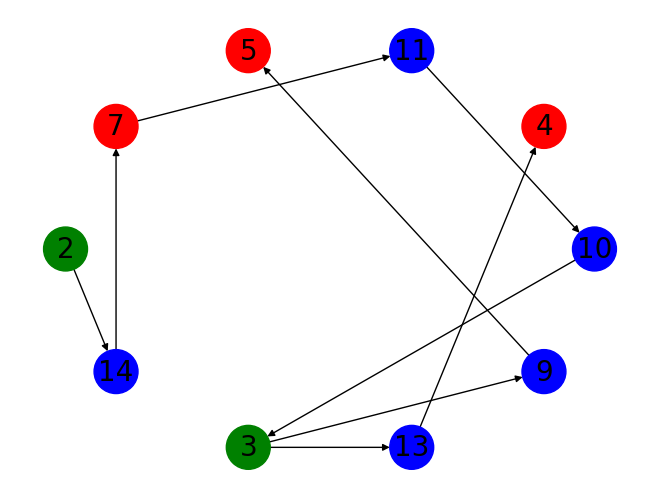

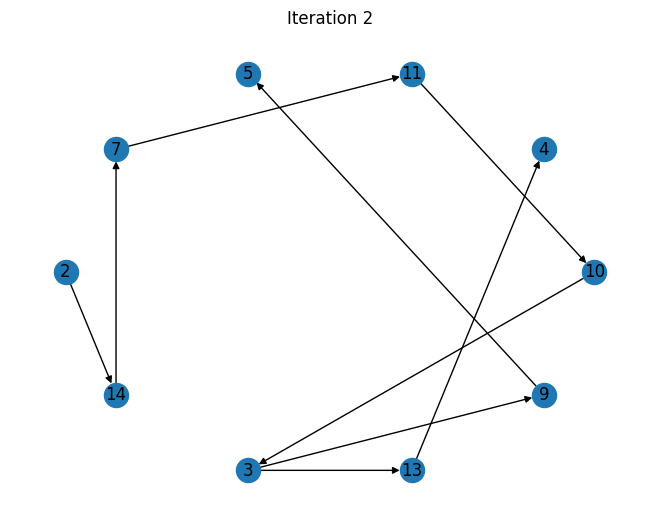

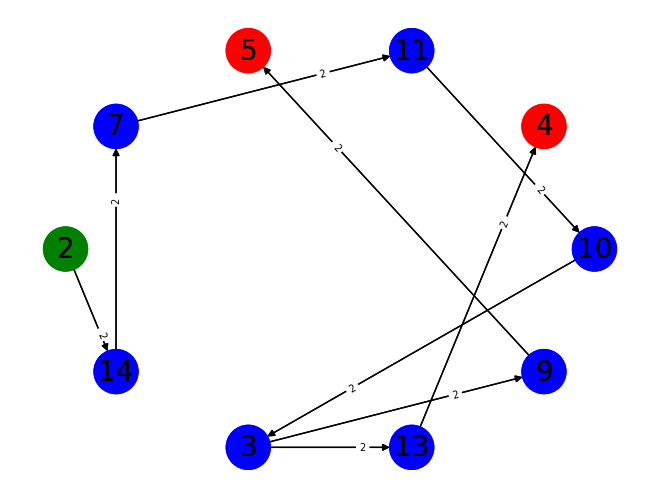

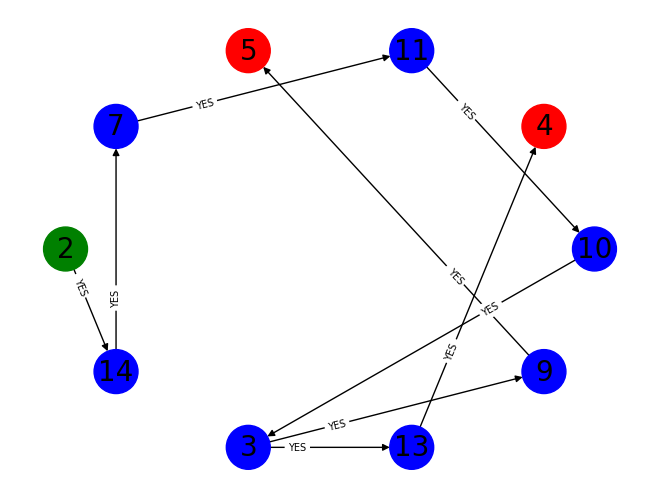

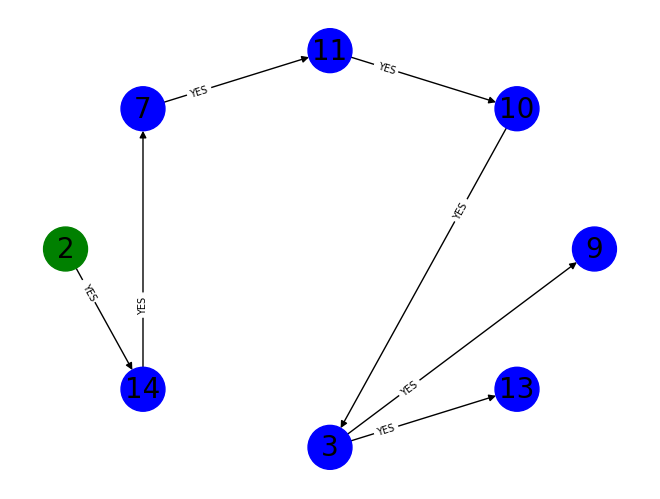

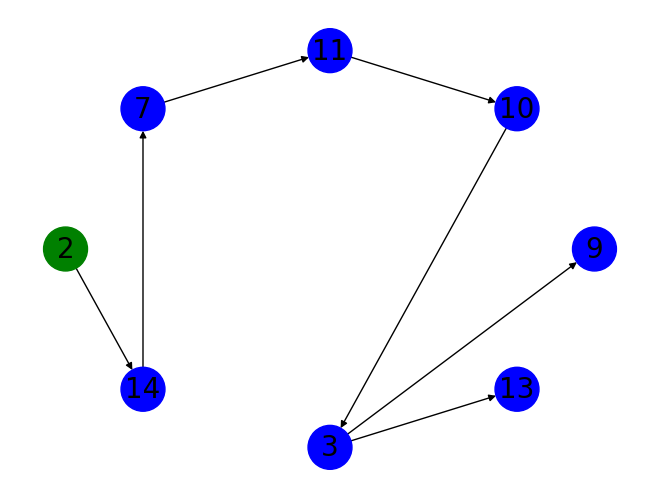

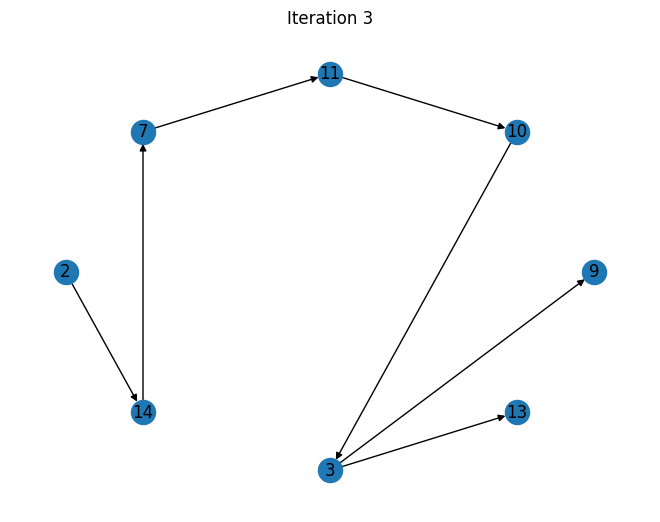

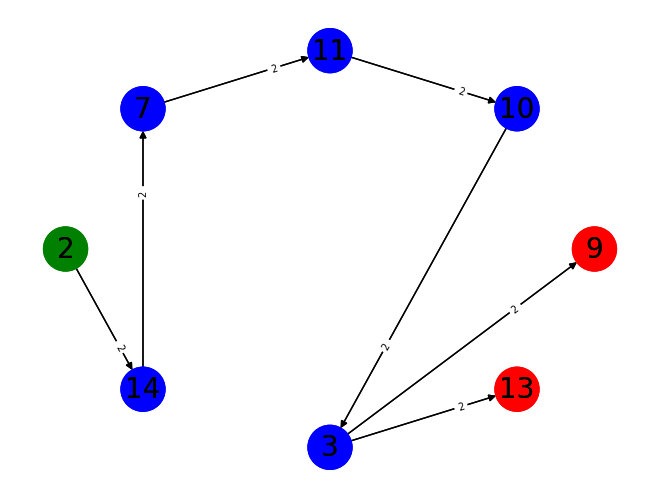

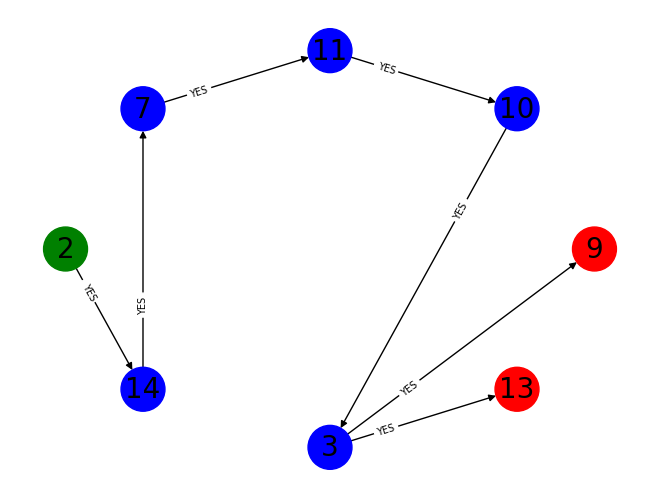

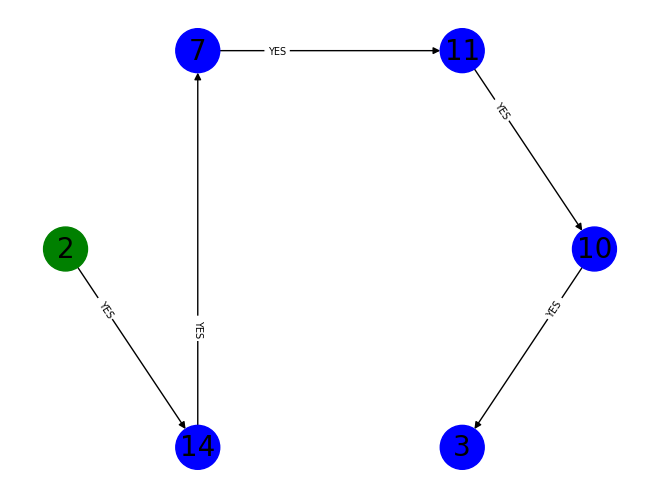

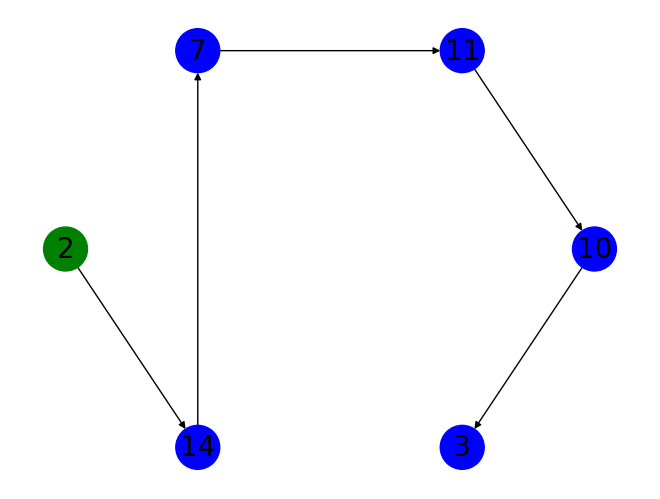

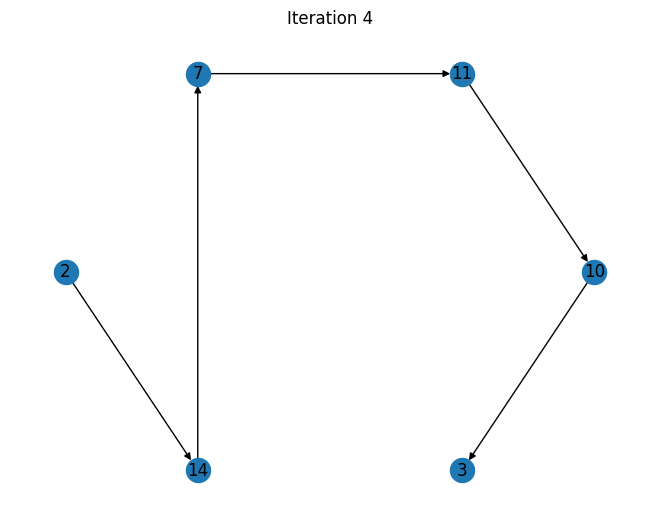

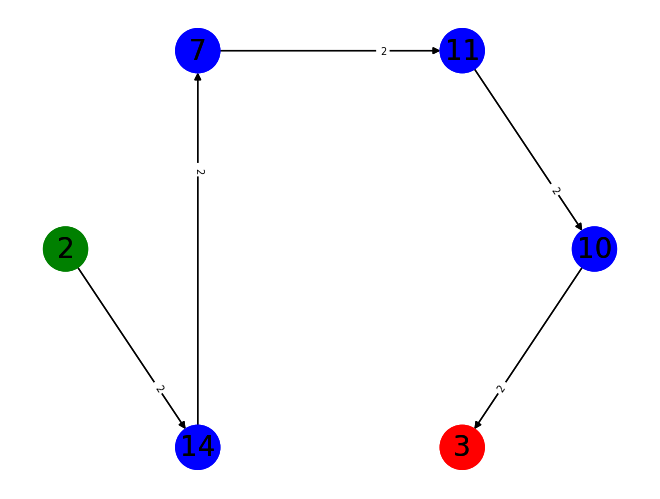

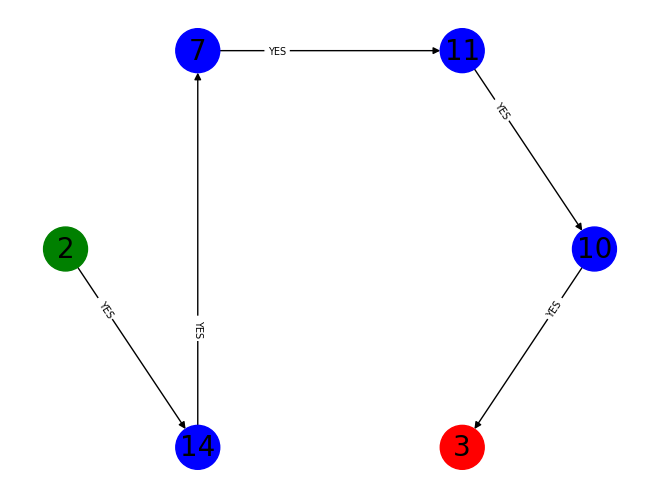

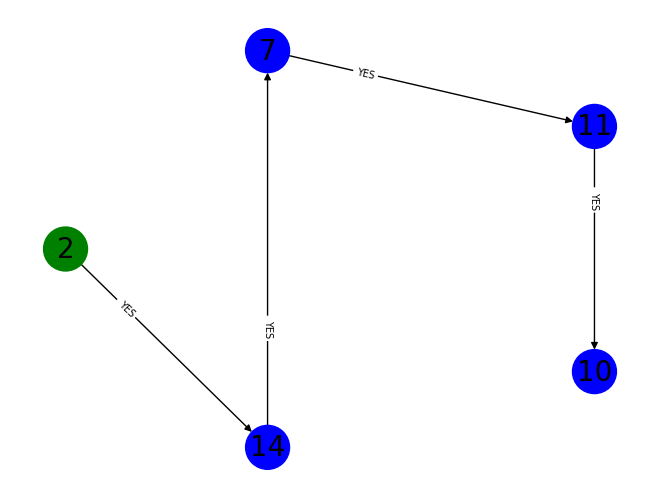

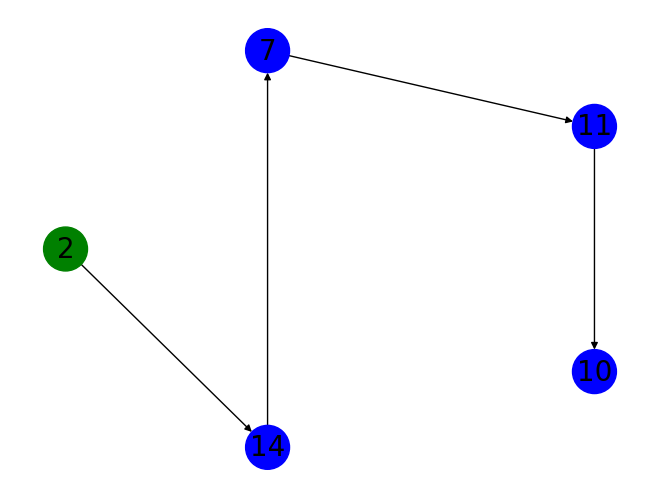

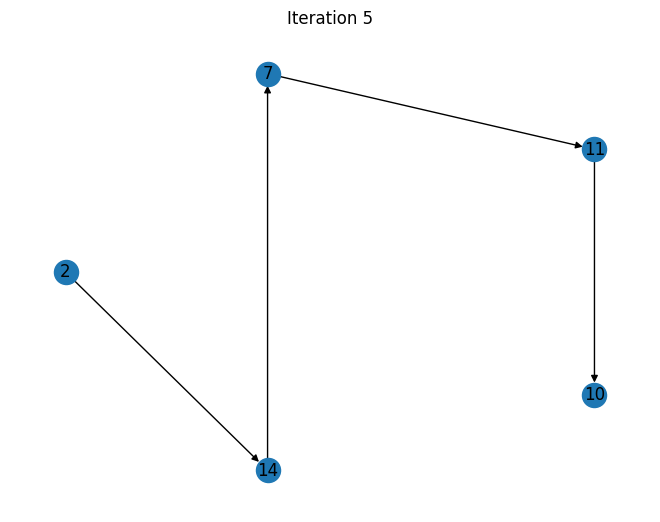

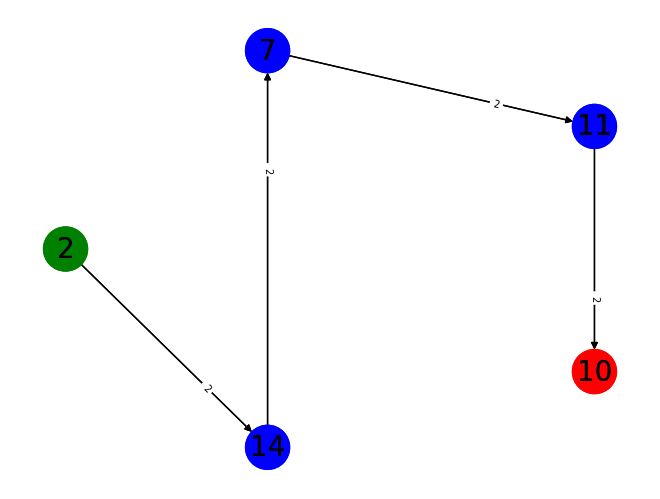

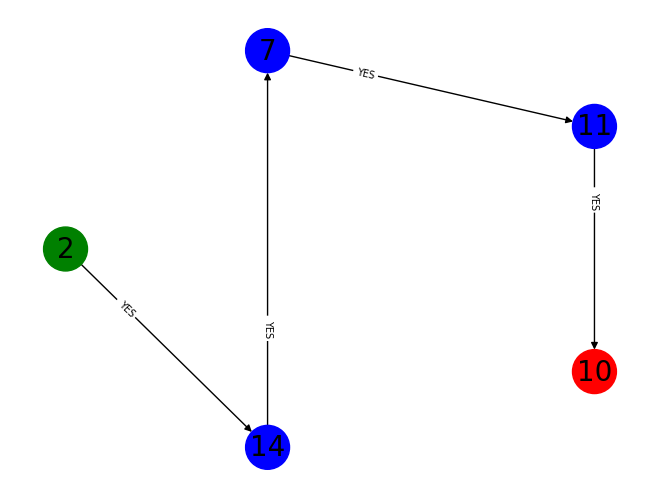

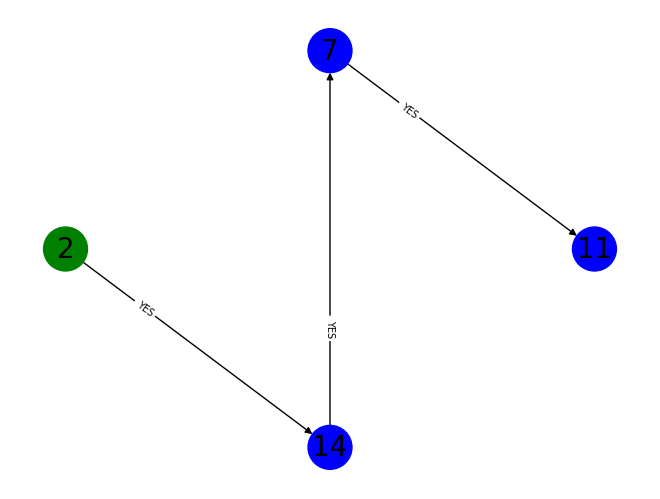

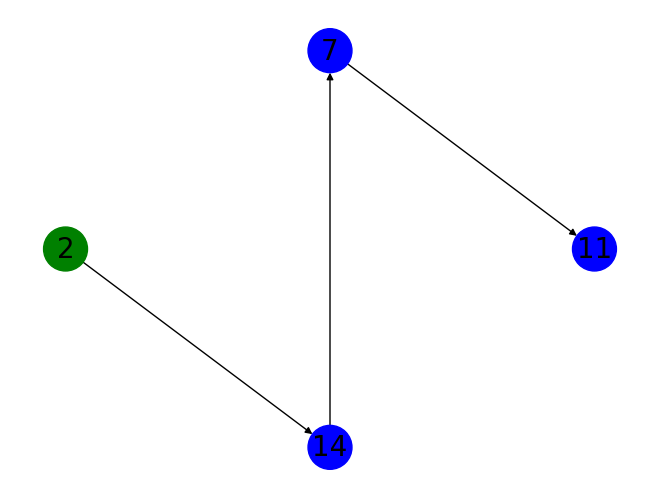

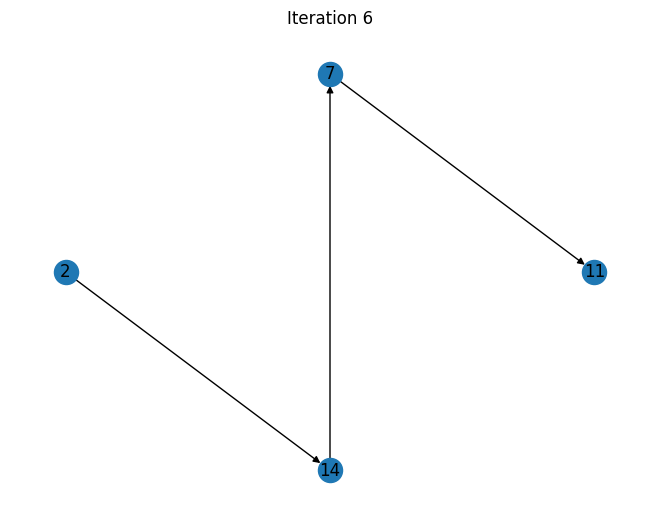

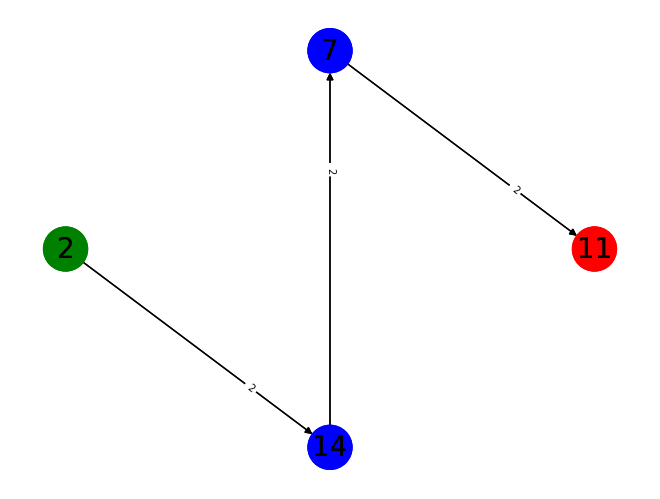

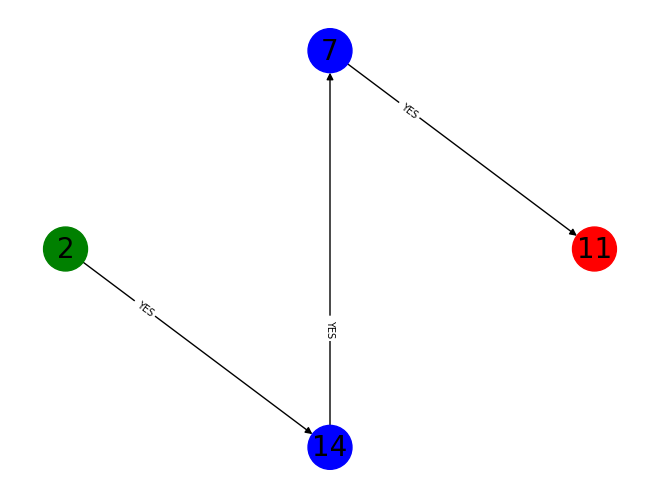

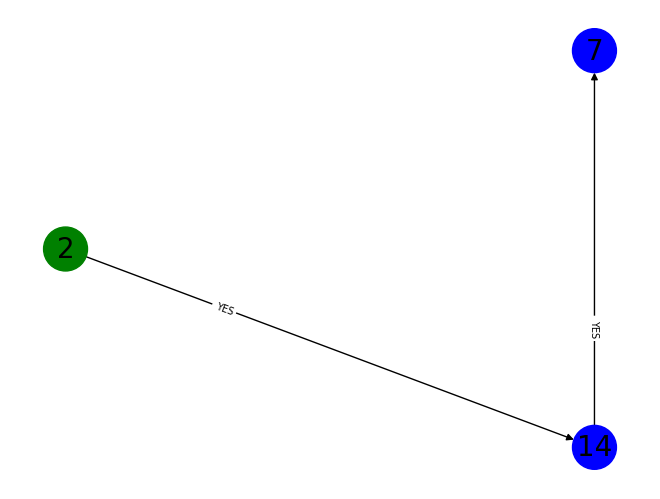

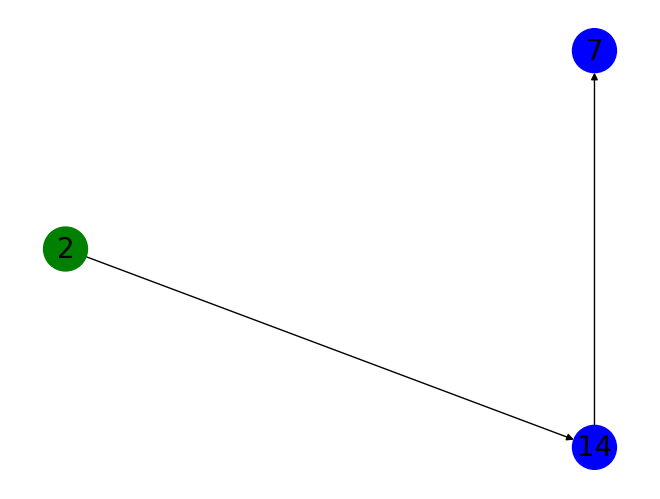

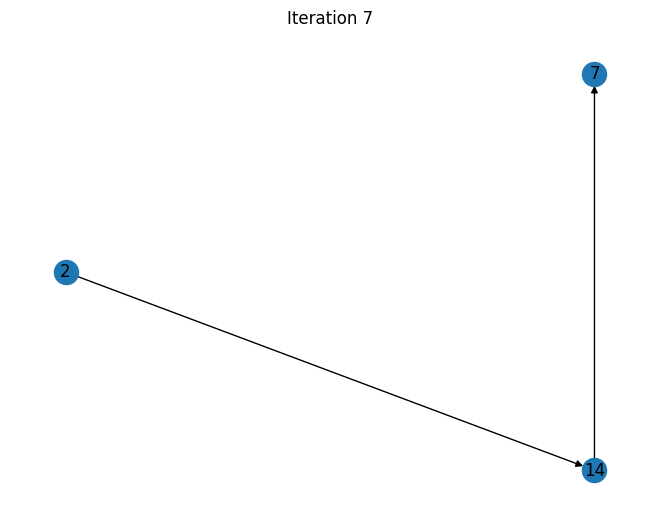

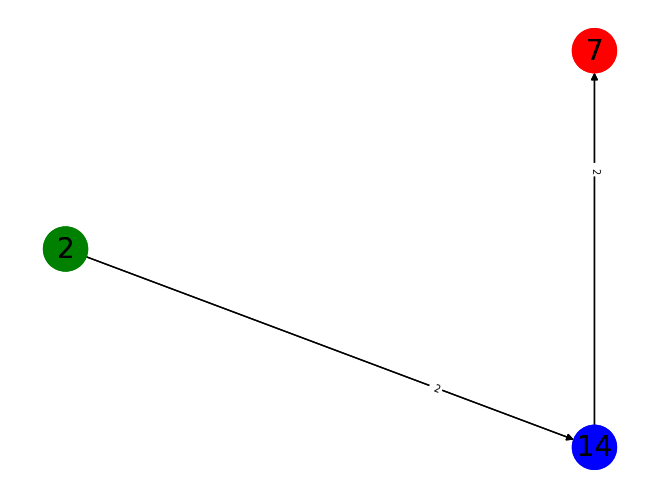

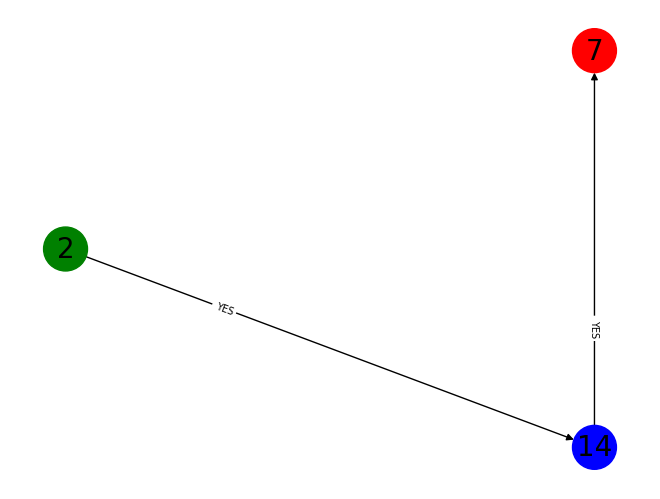

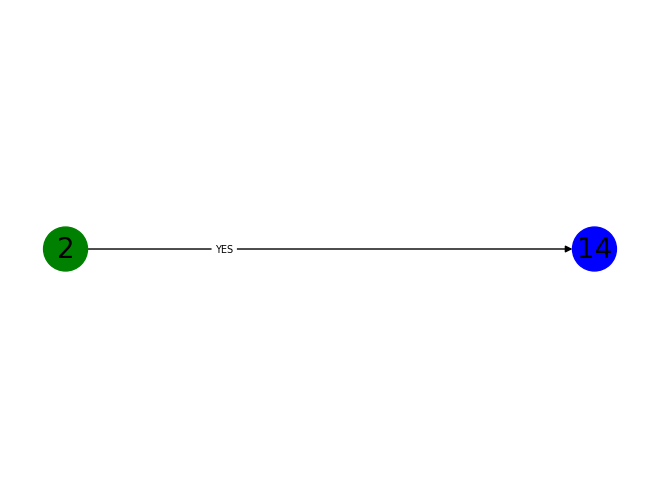

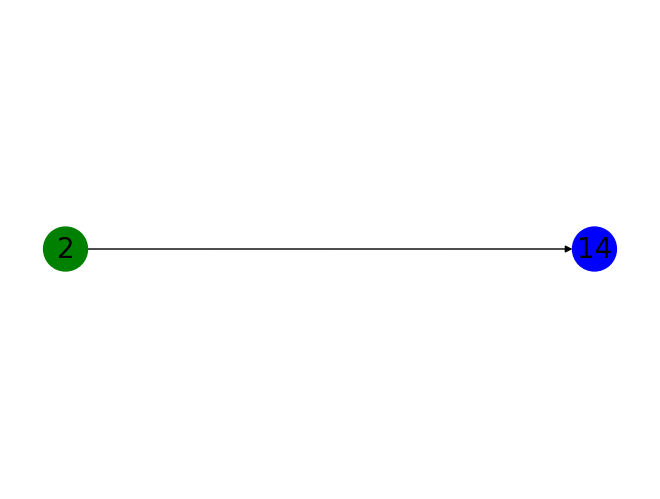

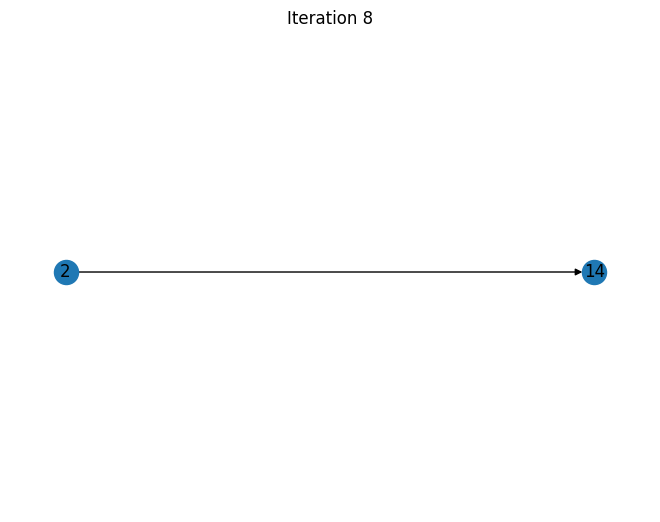

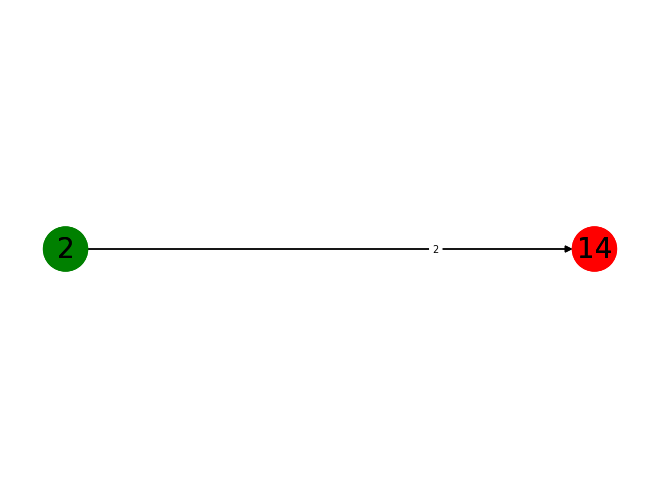

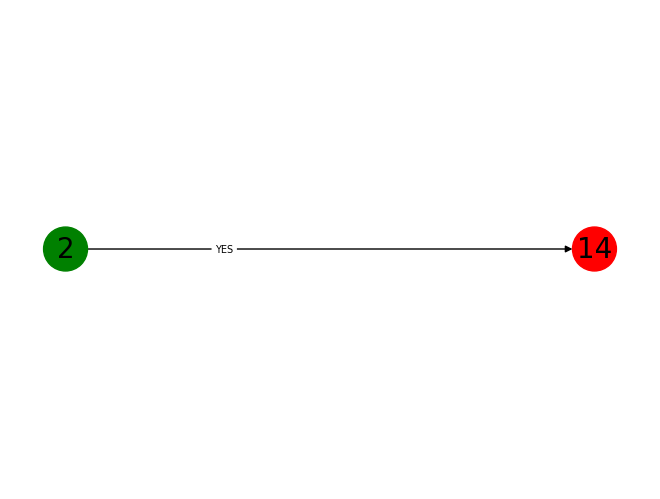

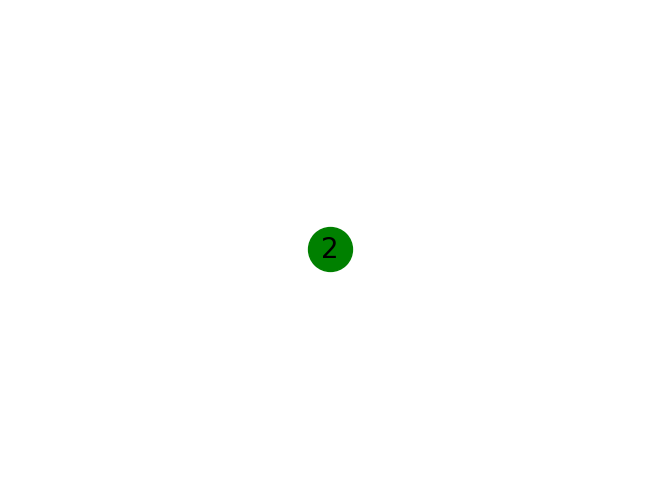

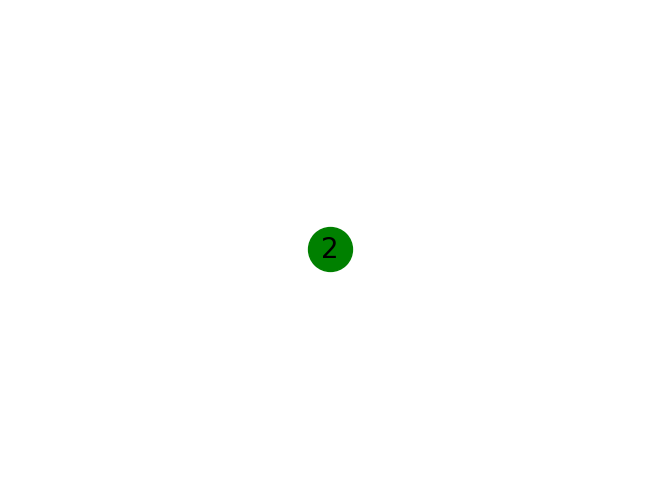

In [20]:
i = 0
while nx.number_of_nodes(G) != 1:
    header = "Iteration " + str(i)
    nx.draw(G, with_labels = True, pos=nx.shell_layout(G))
    plt.title(header)
    plt.show()
    with PdfPages('output.pdf') as pdf:
        pdf.savefig()
    i = i + 1
    sources = set([x for x in G.nodes() if G.out_degree(x)>=1 and G.in_degree(x)==0])
    targets = set([x for x in G.nodes() if G.out_degree(x)==0 and G.in_degree(x)>=1])
    internal = set(G.nodes) - sources - targets
    node_colors = []

    for node in G.nodes:
        if node in sources:
            node_colors.append('green')
        elif node in internal:
            node_colors.append('blue')
        else:
            node_colors.append('red')   

    nx.draw(G, pos=nx.shell_layout(G), with_labels=True, node_color= node_colors, node_size=1000, font_size=20)
    with PdfPages('output.pdf') as pdf:
        pdf.savefig()
    
    edge_labels = {}
    node_labels = {} #minimum value received at each node

    for edge in G.edges:
        if edge[0] in sources:
            edge_labels[edge] = edge[0]
        else:
            edge_labels[edge] = min(nx.ancestors(G, edge[0]))
    for edge in edge_labels:
        node_labels[edge[1]] = min(node_labels.get(edge[1], float('inf')) ,edge_labels[edge])

    nx.draw(G, pos=nx.shell_layout(G), with_labels=True, node_color= node_colors, node_size=1000, font_size=20)
    nx.draw_networkx_edge_labels(G, pos=nx.shell_layout(G), edge_labels=edge_labels, label_pos = 0.3, font_size=7)
    plt.show()
    with PdfPages('output.pdf') as pdf:
        pdf.savefig()
    
    single_yes = dict()
    internal_no = set()
    for edge in edge_labels:
        if edge_labels[edge] != node_labels[edge[1]]:
            edge_labels[edge] = 'NO'
            for nedge in G.in_edges(edge[0]):
                internal_no.add(nedge)
            for node in nx.ancestors(G, edge[0]):
                for nedge in G.in_edges(node):
                    internal_no.add(nedge)
        else:
            edge_labels[edge] = 'YES'
    for edge in internal_no:
        edge_labels[edge] = 'NO'
    for edge in edge_labels:
        if edge[1] in targets:
            if edge_labels[edge] == 'YES':
                single_yes[edge[1]] = single_yes.get(edge[1], 0) + 1
            else:
                single_yes.pop(edge[1], None)
    single_yes = {x for x in single_yes if single_yes[x] == 1}
    nx.draw(G, pos=nx.shell_layout(G), with_labels=True, node_color= node_colors, node_size=1000, font_size=20)
    nx.draw_networkx_edge_labels(G, pos=nx.shell_layout(G), edge_labels=edge_labels, label_pos = 0.7, font_size=7)
    plt.show()
    with PdfPages('output.pdf') as pdf:
        pdf.savefig()
    prune = set()
    edges_to_flip = []
    delete_edges = []
    for edge in edge_labels:
        if edge_labels[edge] == 'YES':
            if edge[1] in prune:
                G.remove_edge(edge[0], edge[1])
                delete_edges.append(edge)
            elif edge[1] in single_yes:
                G.remove_edge(edge[0], edge[1])
                G.remove_node(edge[1])
                delete_edges.append(edge)
            else:
                prune.add(edge[1])
        elif edge_labels[edge] == 'NO':
            edges_to_flip.append(edge)

    for edge in delete_edges:
        del edge_labels[edge]

    node_colors = []
    for node in G.nodes:
        if node in sources:
            node_colors.append('green')
        elif node in internal:
            node_colors.append('blue')
        else:
            node_colors.append('red')  
    nx.draw(G, pos=nx.shell_layout(G), with_labels=True, node_color= node_colors, node_size=1000, font_size=20)
    nx.draw_networkx_edge_labels(G, pos=nx.shell_layout(G), edge_labels=edge_labels, label_pos = 0.7, font_size=7)
    plt.show()
    with PdfPages('output.pdf') as pdf:
        pdf.savefig()
    for edge in edges_to_flip:
        G.remove_edge(edge[0], edge[1])
        G.add_edge(edge[1], edge[0])
    nx.draw(G, pos=nx.shell_layout(G), with_labels=True, node_color= node_colors, node_size=1000, font_size=20)
    plt.show()
    with PdfPages('output.pdf') as pdf:
        pdf.savefig()
